<b>LetsGrowMore</br>
MadeBy : Zeeshan Mohammed Husain Chitapure</br>
Data Science Intern<br>
Task2 : Prediction using Decision Tree  Algorithm  </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.duplicated().sum()

1

In [7]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

<b>Univariate Analysis<b>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


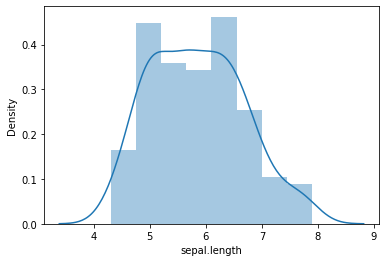

In [9]:
sns.distplot(df["sepal.length"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


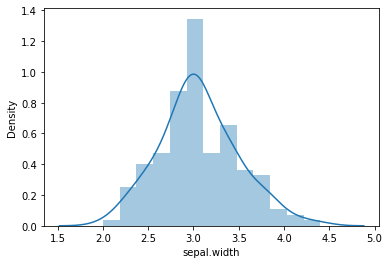

In [10]:
sns.distplot(df["sepal.width"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


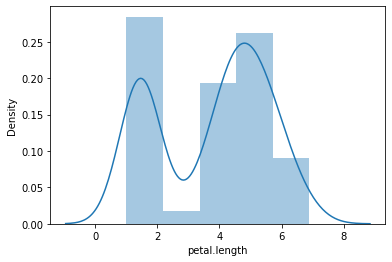

In [11]:
sns.distplot(df["petal.length"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


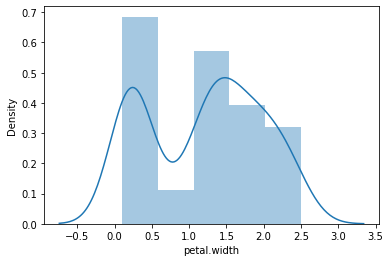

In [12]:
sns.distplot(df["petal.width"])

<b>Bivariate Analysis<b>

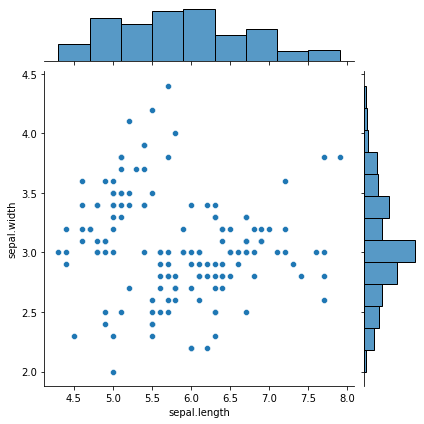

In [13]:
sns.jointplot(x='sepal.length', y='sepal.width', data=df, kind = 'scatter')

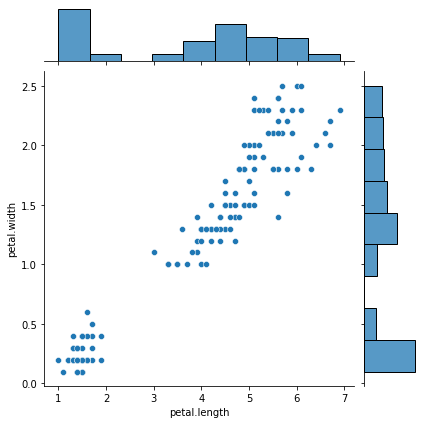

In [14]:
sns.jointplot(x='petal.length', y='petal.width', data=df, kind = 'scatter')

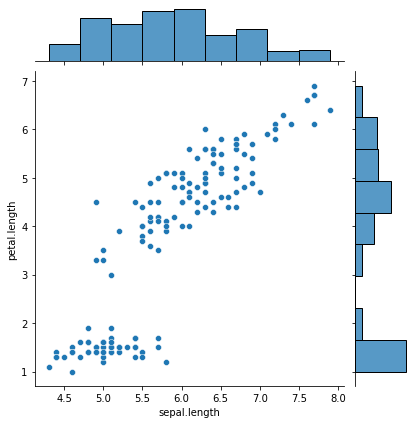

In [15]:
sns.jointplot(x='sepal.length', y='petal.length', data=df, kind = 'scatter')

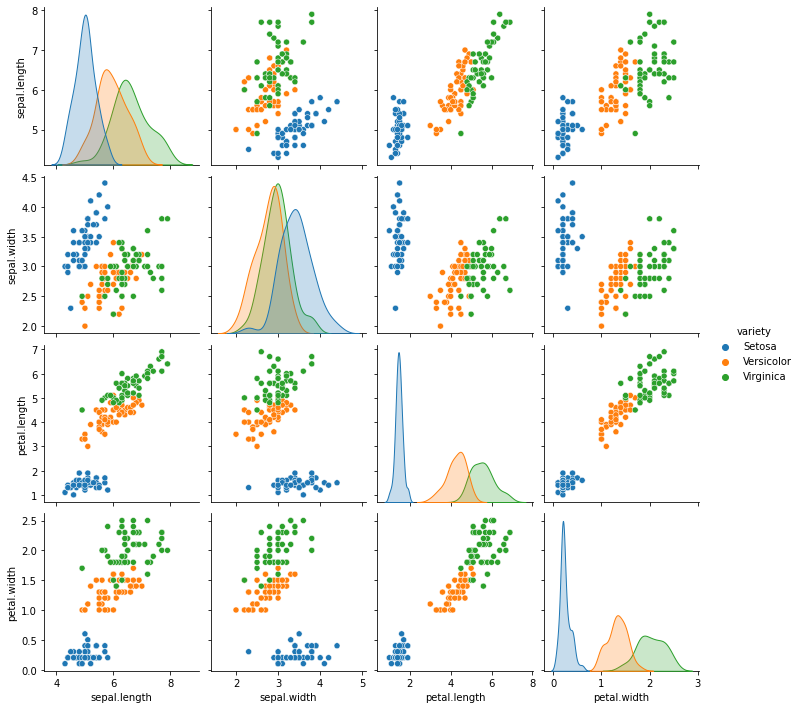

In [16]:
sns.pairplot(df, hue='variety')

**Observation**

We can clearly see  we don't have to consider all 4 variables to build model. We can consider either one of the following pair:<br>

1.PetalLength and SepalLength<br>
2.PetalLength and SepalWidth<br>
3.PetalLength and PetalWidth<br>
4.PetalWidth and SepalLength

<b>Data Preparation<b>

In [17]:
X= df.loc[:,["sepal.length",'petal.width']]
y=df["variety"]

In [18]:
X.head()

,sepal.length,petal.width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [19]:
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(149, 2)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data,y, test_size = 0.2,random_state = 0)

<b>Training<b>

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Prediction

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.9333333333333333

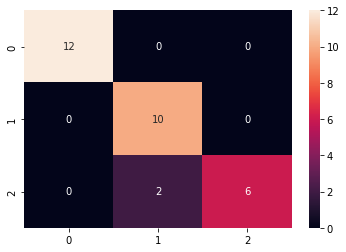

In [25]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.83      1.00      0.91        10
   Virginica       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



In [34]:
criterion=["gini", "entropy"]
max_depth=list(range(1,20))
#parameter grid
grid={"criterion":criterion,"max_depth":max_depth}

#CV
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=classifier,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(X_train,y_train)
print(res.best_score_)
print(res.best_params_)

0.9578282828282829
{'criterion': 'entropy', 'max_depth': 3}


<b>Conclusion:</b></br>
Visualization is Great technique to understand data.</br>
By using only two features and simple DecisionTree we got 93% accuracy. </br>
With HyperparameterTuning we got best parameters and improved accuracy.
